从sklearn包中导入鸢尾花数据集

构建 y = x ∗w+ b 模型对鸢尾花数据进行分类，线性神经网络

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.datasets import load_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#数据集的特征
x_data=datasets.load_iris().data
x_data

In [2]:
#数据集标签
y_data=datasets.load_iris().target
y_data
y_data.shape

(150,)

In [3]:
data=pd.DataFrame(x_data,columns=["花萼长度","花萼宽度","花蕊长度","花蕊宽度"])
#设置列名队齐
pd.set_option("display.unicode.east_asian_width",True)
#pd.set_option("display.unicode.ambiguous_as_wide",True)
#新加一列
data["类别"]=y_data
data

,花萼长度,花萼宽度,花蕊长度,花蕊宽度,类别
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


数据集乱序并对数据集进行处理

In [4]:
#经过运行发现这seed会影响准确率
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

In [5]:
#训练集取前120个数据
x_train=x_data[:-30]
y_train=y_data[:-30]
#测试集取后30个数据
x_test=x_data[-30:]
y_test=y_data[-30:]

print(y_test.dtype)
#转换数据类型
x_train=tf.cast(x_train,tf.float32)
x_test=tf.cast(x_test,tf.float32)

int32


In [6]:
# 配对[特征，标签]这样的一对,batch是每次喂如多少数据量
train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
print(train)
for x,y in train:
    print(len(x))
    print(len(y))

test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
print(test)
for x,y in test:
    print(len(x))
    print(len(y))

<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>
32
32
32
32
32
32
24
24
<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>
30
30


定义神经网络中所有可训练参数

In [7]:
w1 = tf.Variable(tf.random.truncated_normal([4, 3],stddev=0.1,seed=1))
b1=tf.Variable(tf.random.truncated_normal([3],stddev=0.1,seed=1))

In [8]:
#自定义学习率
lr=0.1
train_loss_results=[]  #创建保存损失函数结果的列表
test_acc=[]
epoch=300
loss_all=0  # 每次epoch分4个step，loss_all记录四个step生成的4个loss的和 30+30+30+24=120 四组

一次epoch包含训练部分和测试部分

In [9]:
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train, depth=3)

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])
        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad,梯度下降
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b1自更新
    # 打印每次epoch的loss信息
    print("Epoch{},loss:{}".format(epoch+1, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # 把loss_all重新设置为0

    # 测试部分
    # 定义预测对的数量和总数
    total_correct, total_number = 0, 0  
    for x_test, y_test in test:
        # 使用上面训练部分更新的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        pred = tf.cast(pred, dtype=y_test.dtype)
        #tf.equal（）函数比较两个元素需要数据类型相同
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        total_number += x_test.shape[0]
    
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("----------------------------")


Epoch1,loss:0.2821310982108116
Test_acc: 0.16666666666666666
----------------------------
Epoch2,loss:0.25459614023566246
Test_acc: 0.16666666666666666
----------------------------
Epoch3,loss:0.22570249810814857
Test_acc: 0.16666666666666666
----------------------------
Epoch4,loss:0.21028399094939232
Test_acc: 0.16666666666666666
----------------------------
Epoch5,loss:0.19942265003919601
Test_acc: 0.16666666666666666
----------------------------
Epoch6,loss:0.18873639777302742
Test_acc: 0.5
----------------------------
Epoch7,loss:0.17851299047470093
Test_acc: 0.5333333333333333
----------------------------
Epoch8,loss:0.16922875121235847
Test_acc: 0.5333333333333333
----------------------------
Epoch9,loss:0.16107672825455666
Test_acc: 0.5333333333333333
----------------------------
Epoch10,loss:0.15404684096574783
Test_acc: 0.5333333333333333
----------------------------
Epoch11,loss:0.14802725240588188
Test_acc: 0.5333333333333333
----------------------------
Epoch12,loss:0.1428

Test_acc: 0.8
----------------------------
Epoch95,loss:0.07139724120497704
Test_acc: 0.8
----------------------------
Epoch96,loss:0.07106082793325186
Test_acc: 0.8
----------------------------
Epoch97,loss:0.07072804402559996
Test_acc: 0.8
----------------------------
Epoch98,loss:0.07039884477853775
Test_acc: 0.8
----------------------------
Epoch99,loss:0.07007318455725908
Test_acc: 0.8333333333333334
----------------------------
Epoch100,loss:0.06975101679563522
Test_acc: 0.8666666666666667
----------------------------
Epoch101,loss:0.06943229679018259
Test_acc: 0.8666666666666667
----------------------------
Epoch102,loss:0.06911697424948215
Test_acc: 0.8666666666666667
----------------------------
Epoch103,loss:0.06880501098930836
Test_acc: 0.8666666666666667
----------------------------
Epoch104,loss:0.06849636044353247
Test_acc: 0.8666666666666667
----------------------------
Epoch105,loss:0.06819096487015486
Test_acc: 0.8666666666666667
----------------------------
Epoch106,l

Epoch189,loss:0.05086294002830982
Test_acc: 1.0
----------------------------
Epoch190,loss:0.05072600580751896
Test_acc: 1.0
----------------------------
Epoch191,loss:0.05059020034968853
Test_acc: 1.0
----------------------------
Epoch192,loss:0.05045549105852842
Test_acc: 1.0
----------------------------
Epoch193,loss:0.050321875140070915
Test_acc: 1.0
----------------------------
Epoch194,loss:0.050189342349767685
Test_acc: 1.0
----------------------------
Epoch195,loss:0.050057871267199516
Test_acc: 1.0
----------------------------
Epoch196,loss:0.049927460961043835
Test_acc: 1.0
----------------------------
Epoch197,loss:0.049798086285591125
Test_acc: 1.0
----------------------------
Epoch198,loss:0.04966974910348654
Test_acc: 1.0
----------------------------
Epoch199,loss:0.04954242706298828
Test_acc: 1.0
----------------------------
Epoch200,loss:0.049416120164096355
Test_acc: 1.0
----------------------------
Epoch201,loss:0.04929080791771412
Test_acc: 1.0
----------------------

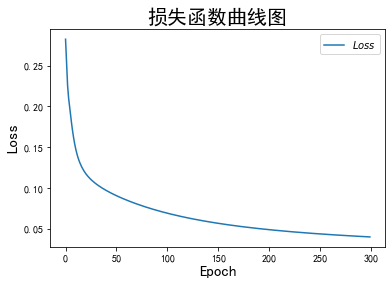

In [10]:
#设置黑体为默认字体
plt.rcParams["font.sans-serif"] = "SimHei"
#设置正常显示负号
plt.rcParams["axes.unicode_minus"] = False
plt.title("损失函数曲线图",fontsize=20)
plt.xlabel("Epoch",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.plot(train_loss_results,label="$Loss$")
plt.legend()
plt.show()

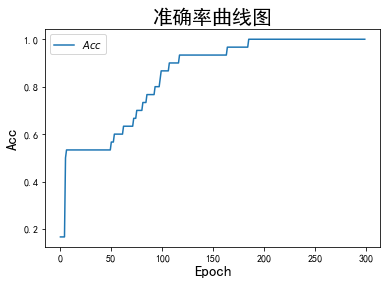

In [11]:
plt.title("准确率曲线图",fontsize=20)
plt.xlabel("Epoch",fontsize=15)
plt.ylabel("Acc",fontsize=15)
plt.plot(test_acc,label="$Acc$")
plt.legend()
plt.show()